# **Proyek Machine Learning Terapan**



*   Nama        : Muhammad Khalish
*   E-mail      : khalish.21muhammad07@gmail.com
*   Dicoding ID : https://www.dicoding.com/users/mkhlst/
*   Topic       : Agriculture



# **Deskripsi proyek**

Saat ini, proses penanaman benih pada lahan yang dilakukan di Indonesia berdasarkan komoditas unggulan di daerah masing-masing. Namun, ada beberapa hal yang perlu diperhatikan dalam memilih jenis komoditas yang ingin dibudidayakan. hal ini dikarenakan lahan pada masing-masing daerah memiliki kandungan hara yang berbeda. Hal ini juga yang menyebabkan produktivitas pertanian tidak maksimal. oleh karena itu, proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi kecocokan tanah dengan komoditas tanaman.

# **Import library yang dibutuhkan**

In [ ]:
!pip install -q kaggle

In [ ]:
# Import load data library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import preprocessing library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Import train test split
from sklearn.model_selection import train_test_split
# Import Model
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Data Understanding**

Merupakan proses untuk memahami informasi dalam data dan menentukan kualitas data

## **Data Loading**

Merupakan proses untuk memuat dataset agar dapat digunakan. Dataset berikut sudah dibersihkan terlebih dahulu uleh pembuat, sehingga mudah dan ramah digunakan.

**Informasi Dataset**

| Jenis | Keterangan |
| ------ | ------ |
| Title | Crop Recommendation |
| Source | [Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) |
| Maintainer | [Atharva Ingle ⚡](https://www.kaggle.com/atharvaingle) |
| License | Apache 2.0 |
| Visibility | Publik |
| Tags | Tabular, Agriculture, Recommender Systems |
| Usability | 7.06 |

In [ ]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

# Ekstrak berkas zip
!unzip /content/crop-recommendation-dataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 51.6MB/s]
Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Berdasarkan informasi diatas, diketahui bahwa terdapat 8 kolom, yakni

* N --> perbandingan kandungan nitrogen pada tanah
* P --> perbandingan kandungan fosfor pada tanah
* K --> perbandingan kandungan potasium pada tanah
* temperature --> temperatur pada satuan celsius
* humidity --> persentase kelembaban tanah
* ph --> nilai pH tanah
* rainfall --> intensitas hujan dalam mm
* label --> jenis tanaman yang cocok

## **Exploratory Data Analysis (EDA)**

Exploratory data analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data

### **Deskripsi Variabel**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Berdasarkan informasi diatas, terdapat total `2200 baris` dan `8 kolom` yang terdiri dari

* 7 kolom numerik, dimana 3 kolom dengan tipe data integer (N, P, dan K) dan 4 kolom dengan tipe data float (temperature, humidity, ph, dan rainfall)
* 1 kolom kategori dengan tipe data object yaitu label yang merupakan data jenis tanaman

### **Menangani Missing Value dan Outlier**

In [ ]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
print('Jumlah duplikat:', df.duplicated().sum())
print(df.shape)
df.describe()

Jumlah duplikat: 0
(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: xlabel='N'>

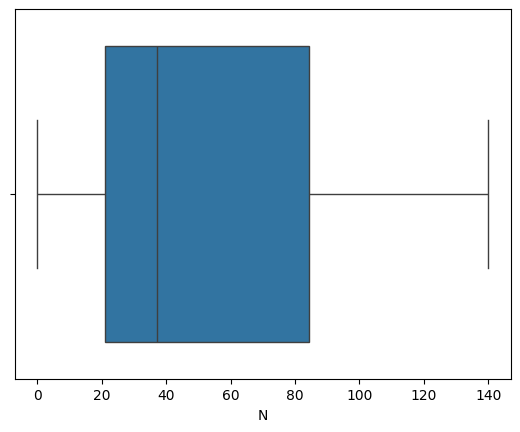

In [ ]:
sns.boxplot(x = df['N'])

<Axes: xlabel='P'>

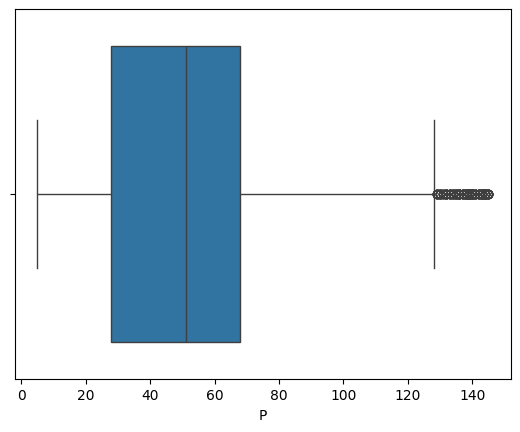

In [ ]:
sns.boxplot(x = df['P'])

<Axes: xlabel='K'>

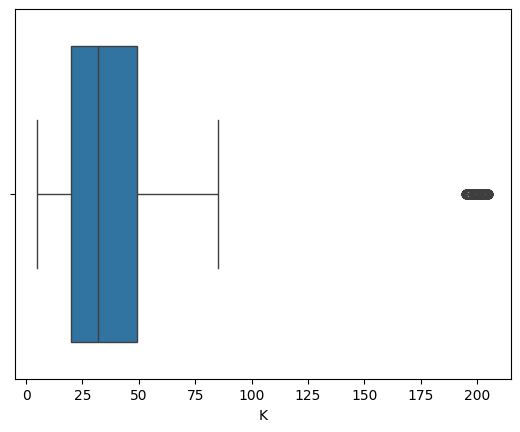

In [ ]:
sns.boxplot(x = df['K'])

<Axes: xlabel='temperature'>

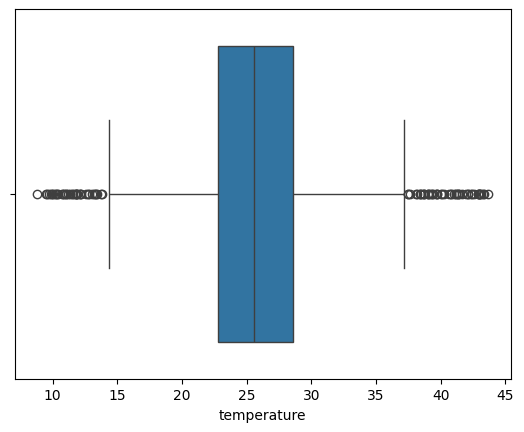

In [ ]:
sns.boxplot(x = df['temperature'])

<Axes: xlabel='humidity'>

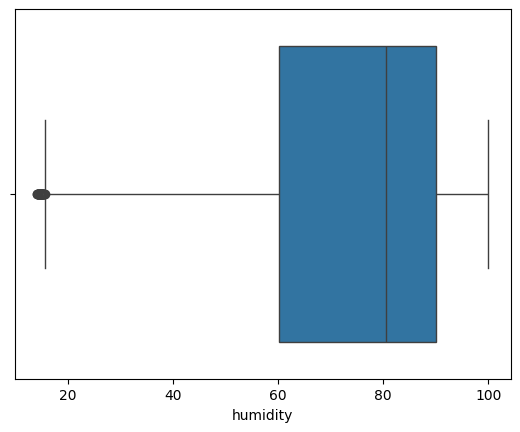

In [ ]:
sns.boxplot(x = df['humidity'])

<Axes: xlabel='ph'>

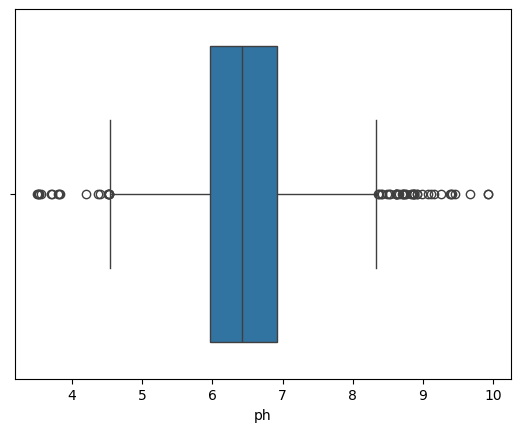

In [ ]:
sns.boxplot(x = df['ph'])

<Axes: xlabel='rainfall'>

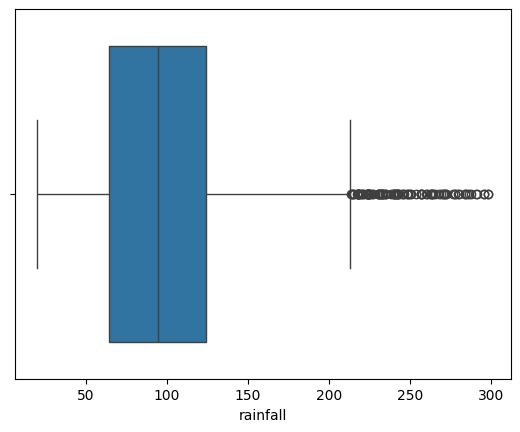

In [ ]:
sns.boxplot(x = df['rainfall'])

Setelah dilakukan pengecekan menggunakan fungsi `isna.sum()` dan `duplicated.sum()`, tidak terdapat informasi data yang hilang dan terduplikasi. Namun, terdapat outlier pada fitur-fitur seperti P, K, temperature, humidity, pH, dan rainfall dengan menggunakan teknik visualisasi data boxplot.

In [ ]:
# Memilih kolom yang berisi tipe data numerik
numeric_col = df.select_dtypes(include=np.number).columns
numeric_col = [col for col in numeric_col if col != 'label']

# Menangani outlier menggunakan IQR Method
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[~((df[numeric_col] < (Q1 - 1.5 * IQR)) |(df[numeric_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Melihat bentuk data setelah penyaringan
filtered_df.shape

(1768, 8)

Jumlah data setelah penyaringan outlier menggunakan metode IQR menjadi `1768` baris dari `2200` baris awal

### **Univariate Analysis**

In [ ]:
df = df.rename(columns = {'N':'Nitrogen', 'P':'Phosphorus', 'K':'Potassium',
                          'temperature':'Temperature', 'humidity':'Humidity',
                          'ph':'pH', 'rainfall':'Rainfall', 'label':'Crop'})
categorical_feature = 'Crop'
numerical_feature = df.select_dtypes(include='number').columns.tolist()

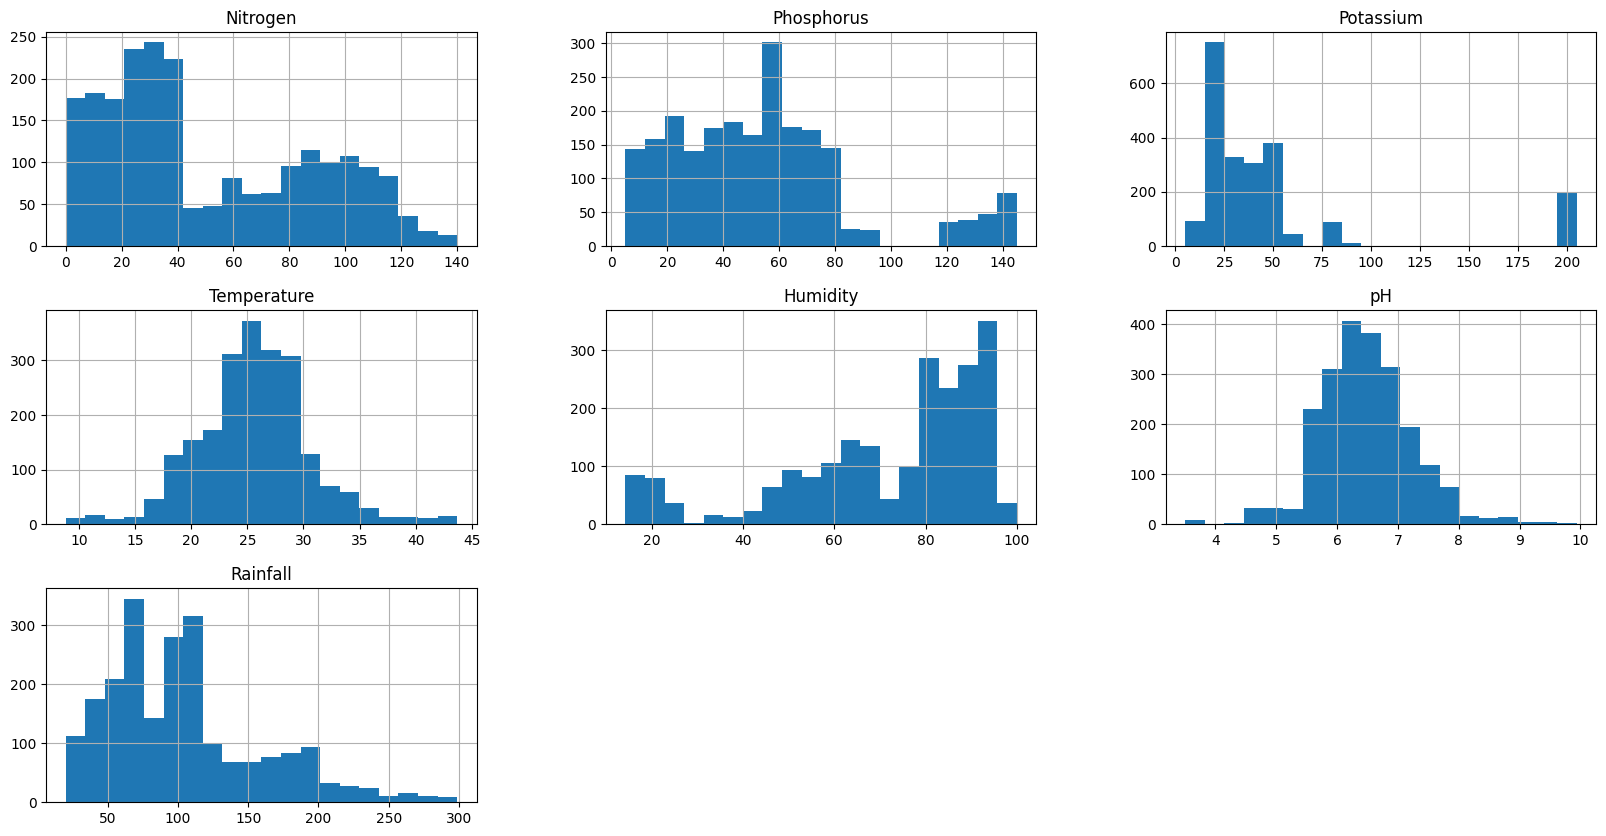

In [ ]:
df.hist(bins=20, figsize=(20,10))
plt.show()

Dapat dilihat pada grafik bahwa sebaran data masing-masing fitur bervariasi

### **Multivariate Analysis**

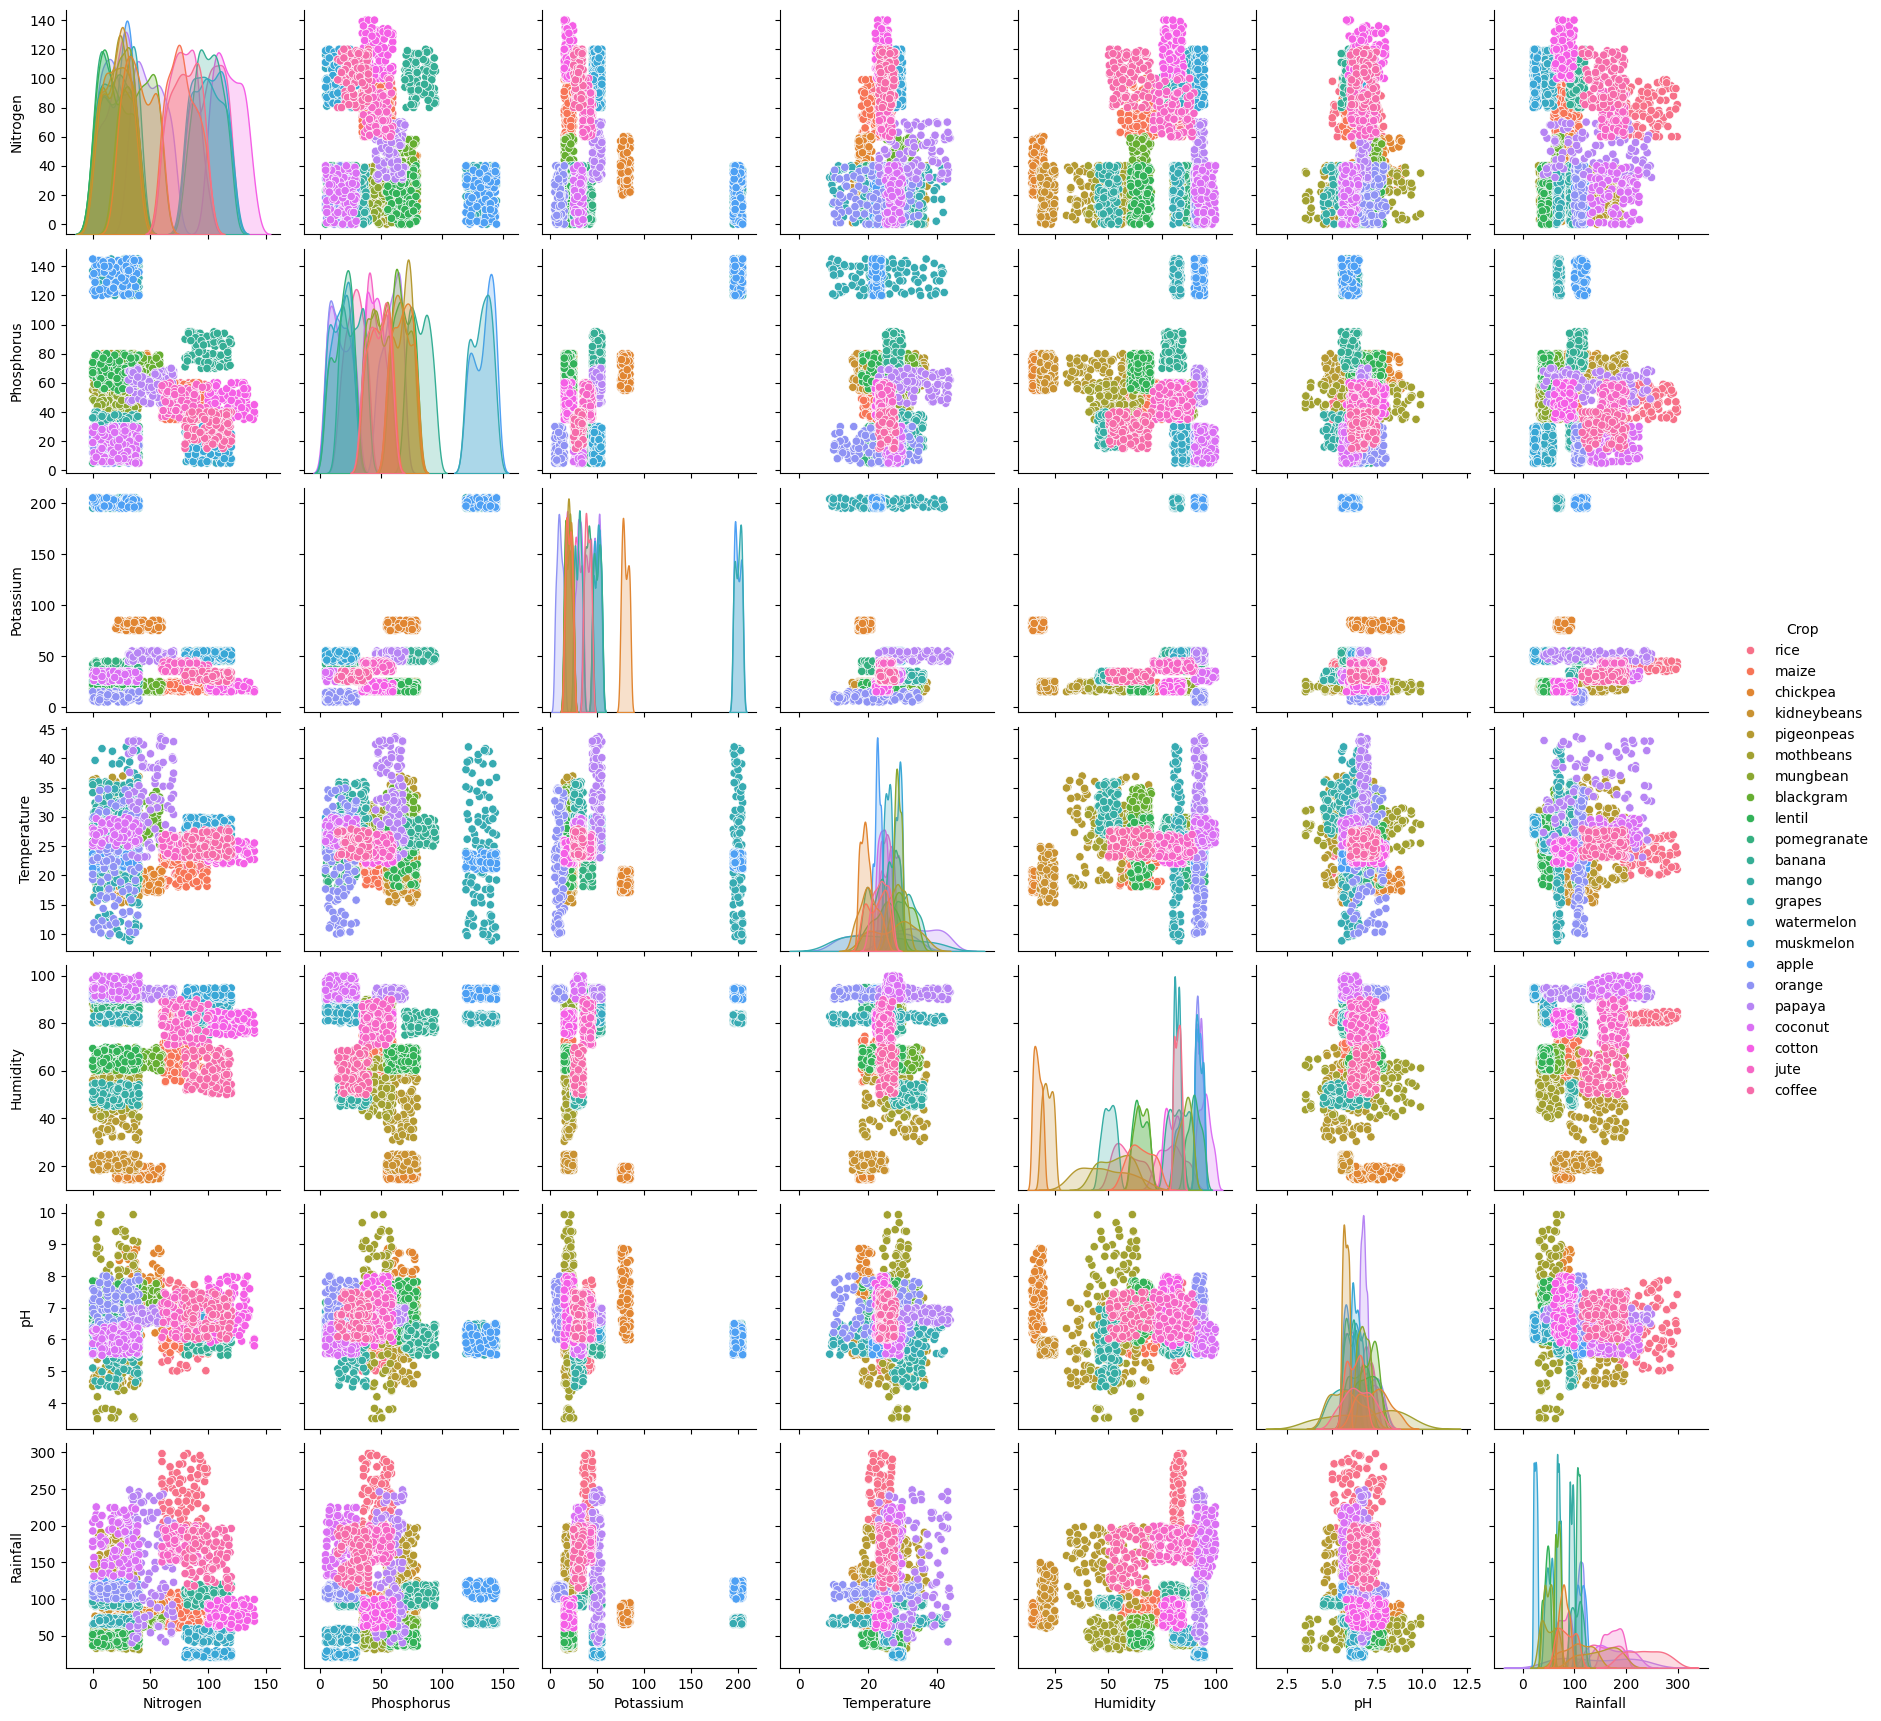

In [ ]:
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde')

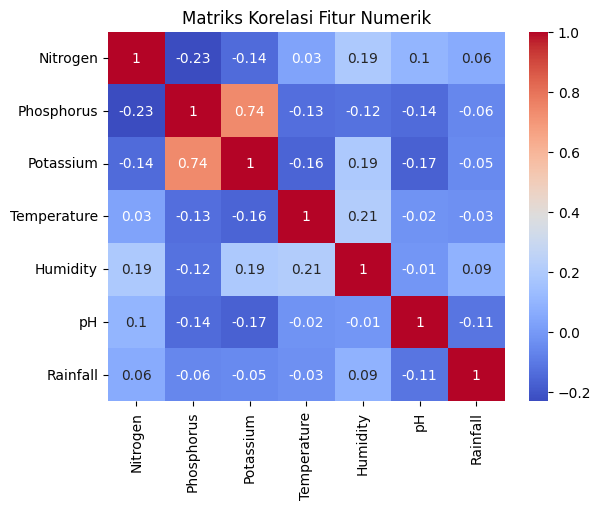

In [ ]:
corr_matrix = df[numerical_feature].corr().round(2)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Pada matrik korelasi diatas, dapat diketahui

*   Fitur Phosporus dan Potassium memiliki korelasi positif yang tinggi.
*   Fitur Rainfall tidak memiliki korelasi terhadap fitur lain.



# **Data Preparation**

merupakan proses untuk mempersiapkan data sebelum dilakukan tahap pembuatan model machine learning

## **Data Cleaning**

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Crop'])
df['label'] = labels
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


data crop diberikan label unik dengan menggunakan fungi `labelEncoder()` untuk memudahkan saat data preparation dan model development.

## **Train Test Split**

In [ ]:
x = df[df.select_dtypes(include=np.number).columns.drop('label')]
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2200
Total # of sample in train dataset: 1760
Total # of sample in test dataset: 440


## **Normalisasi**

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Rentang nilai pada data numerik bervariasi sehingga diperlukan normalisasi agar rentang nilai data memiliki skala yang sama. Hal ini juga berpengaruh pada pengembangan model yang sensitif terhadap skala.

# **Model Development**

### **Lazy Predict**

LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 30/31 [00:11<00:00,  1.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.224574
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [Info] Start training from score -3.030418
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] 

100%|██████████| 31/31 [00:14<00:00,  2.08it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               0.99    None      1.00   
ExtraTreesClassifier               0.99               0.99    None      0.99   
SVC                                0.99               0.99    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
DecisionTreeClassifier             0.98               0.98    None      0.98   
LabelPropagation                   0.98               0.98    None      0.98   
LabelSpreading                     0.98 

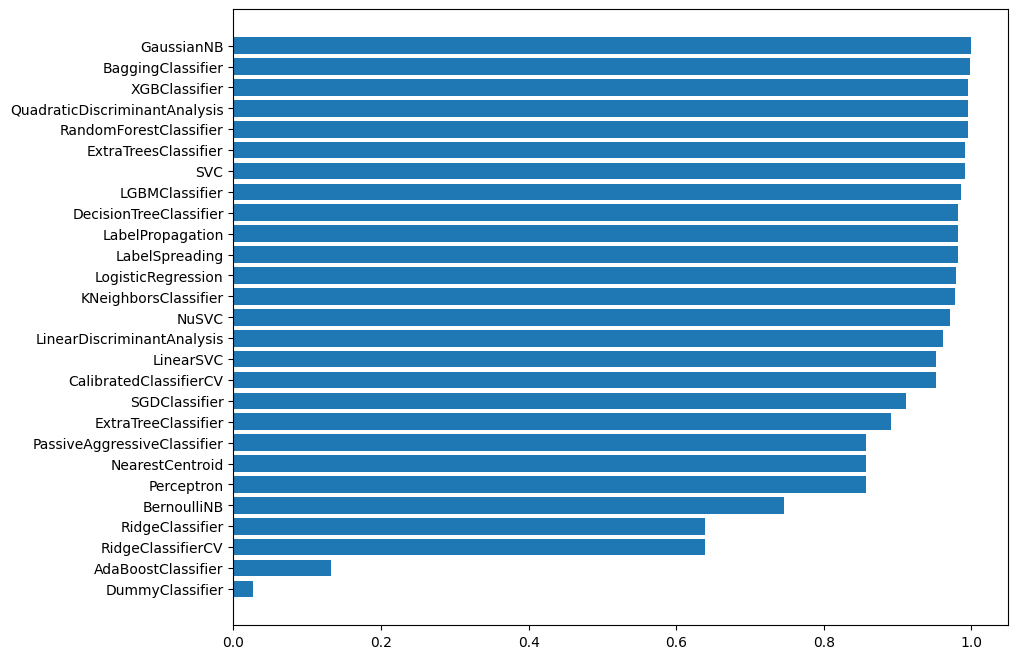

In [ ]:
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()

### **Pembuatan Model**


Mempersiapkan DataFrame untuk Analisis Model

In [ ]:
model = pd.DataFrame(index = ['train_cc', 'test_acc'],
                            columns = ['SVM', 'MLP', 'RF', 'GB'])

Membuat Model Support Vector Machine (SVM)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)

model.loc['train_acc', 'SVM'] = accuracy_score( y_pred = svm.predict(x_train), y_true = y_train)

Membuat Model Multi Layer Perceptron (MLP)

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

model.loc['train_acc', 'MLP'] = accuracy_score(y_pred = mlp.predict(x_train), y_true = y_train)

Membuat Model Multi Layer Perceptron (MLP)

In [ ]:
rf = RandomForestClassifier(max_depth=20)
rf.fit(x_train, y_train)

model.loc['train_acc', 'RF'] = accuracy_score(y_pred = rf.predict(x_train), y_true = y_train)

Parameter yang digunakan yaitu `max_depth` sebesar 20 berfungsi untuk menentukan kedalaman maksimum tiap pohon keputusan dalam Random Forest.



Membuat Model Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.001, n_estimators=200)
gb.fit(x_train, y_train)

model.loc['train_acc', 'GB'] = accuracy_score(y_pred = gb.predict(x_train), y_true = y_train)

Parameter yang digunakan


*   `learning_rate` = 0.001. Bobot yang diterapkan pada setiap classfier di masing-masing proses iterasi boosting.
*   `n_estimator`  = 200.  Jumlah pohon keputusan (weak learners) yang akan dibangun dalam model.



# **Evaluasi Model**

In [ ]:
# Buat dataframe untuk menyimpan akurasi data train dan test
acc = pd.DataFrame(columns=['train', 'test'], index=['SVM', 'MLP', 'RF', 'GB'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'SVM': svm, 'MLP': mlp, 'RF': rf, 'GB': gb}

# Hitung akurasi untuk setiap algoritma
for name, model in model_dict.items():
    # Prediksi pada data train dan test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Simpan akurasi ke dalam dataframe
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=y_test_pred)

# Tampilkan dataframe acc
acc

,train,test
SVM,0.98,0.99
MLP,0.98,0.99
RF,1.00,1.00
GB,0.96,0.91


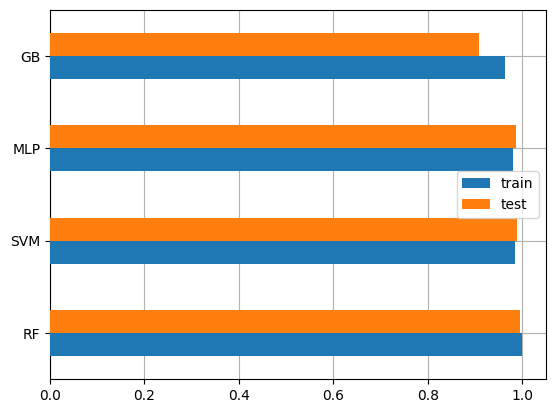

In [ ]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = x_test[:1].copy()
pred_dict = {'y_true':y_test[:1].values.tolist()[0]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)[0].tolist()

pd.DataFrame([pred_dict])

,y_true,prediksi_SVM,prediksi_MLP,prediksi_RF,prediksi_GB
0,10,10,10,10,10
